### Data Collection

#### Chicago Taxi Trip data collection and cleaning

In [1]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("npd7-ywjz", limit=310000)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)

In [2]:
# Read the taxi trip dataset

df.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,...,dropoff_community_area,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,pickup_community_area,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,pickup_census_tract,dropoff_census_tract
0,bcfa19f2539021c054809d4c3993d226996ae095,368ce5511598af2cc07efdb68067d381174fdac1d47a28...,2022-01-01T00:00:00.000,2022-01-01T00:00:00.000,152,0.1,3.75,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2aba69ff015f9ea8e7bff43cab7eddb228f34a12,449fa4909552757130d09d98ebc7770e2dd94579036b0e...,2022-01-01T00:00:00.000,2022-01-01T00:30:00.000,2360,17.44,47.75,0,0,5,...,8,41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",NaN,NaN,NaN,NaN,NaN,NaN
2,54d812a0b88f8f9707825261014b3563a0a60ace,f98ae5e71fdda8806710af321dce58002146886c013f41...,2022-01-01T00:00:00.000,2022-01-01T00:00:00.000,536,4.83,14.75,0,0,0,...,22,41.92276062,-87.699155343,"{'type': 'Point', 'coordinates': [-87.69915534...",28,41.874005383,-87.66351755,"{'type': 'Point', 'coordinates': [-87.66351754...",NaN,NaN
3,7125b9e03a0f16c2dfb5eaf73ed057dc51eb68ef,8eca35a570101ad24c638f1f43eecce9d0cb7843e13a75...,2022-01-01T00:00:00.000,2022-01-01T00:15:00.000,897,2.07,9.75,0,0,1.5,...,32,41.878865584,-87.625192142,"{'type': 'Point', 'coordinates': [-87.62519214...",8,41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",NaN,NaN
4,f1a650ee419b4e52d766432e6f86eca3457bfb37,e2d8418fcdb061eee0a4318fba0a6a1200aaff0143feb0...,2022-01-01T00:00:00.000,2022-01-01T00:30:00.000,2200,2.48,9.36,2.14,0,0,...,32,41.878865584,-87.625192142,"{'type': 'Point', 'coordinates': [-87.62519214...",8,41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",NaN,NaN


In [3]:
# Explore the columns, data types and other information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310000 entries, 0 to 309999
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   trip_id                     310000 non-null  object
 1   taxi_id                     310000 non-null  object
 2   trip_start_timestamp        310000 non-null  object
 3   trip_end_timestamp          309985 non-null  object
 4   trip_seconds                309913 non-null  object
 5   trip_miles                  309985 non-null  object
 6   fare                        309901 non-null  object
 7   tips                        309901 non-null  object
 8   tolls                       309901 non-null  object
 9   extras                      309901 non-null  object
 10  trip_total                  309901 non-null  object
 11  payment_type                310000 non-null  object
 12  company                     310000 non-null  object
 13  dropoff_community_area      2

In [4]:
# Explore the taxi trip columns

df.columns

Index(['trip_id', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'payment_type', 'company', 'dropoff_community_area',
       'dropoff_centroid_latitude', 'dropoff_centroid_longitude',
       'dropoff_centroid_location', 'pickup_community_area',
       'pickup_centroid_latitude', 'pickup_centroid_longitude',
       'pickup_centroid_location', 'pickup_census_tract',
       'dropoff_census_tract'],
      dtype='object')

In [5]:
# Drop unnecessary columns from the table 

df = df.drop(columns=['pickup_census_tract', 'dropoff_census_tract', 
                      'dropoff_centroid_location', 'pickup_centroid_location'])

In [6]:
# Drop rows with null values

df = df.dropna()

In [7]:
# Check the table for null values sum for all the columns

df.isna().sum()

trip_id                       0
taxi_id                       0
trip_start_timestamp          0
trip_end_timestamp            0
trip_seconds                  0
trip_miles                    0
fare                          0
tips                          0
tolls                         0
extras                        0
trip_total                    0
payment_type                  0
company                       0
dropoff_community_area        0
dropoff_centroid_latitude     0
dropoff_centroid_longitude    0
pickup_community_area         0
pickup_centroid_latitude      0
pickup_centroid_longitude     0
dtype: int64

<Axes: >

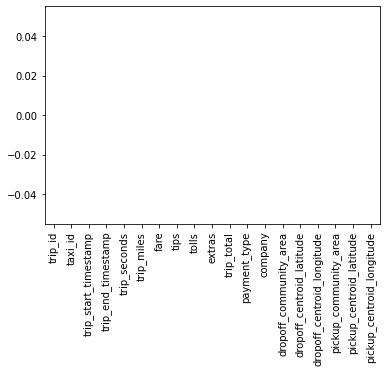

In [8]:
# Visualize the columns with null values

df.isna().sum().plot(kind="bar")

In [9]:
# Convert trip_start_timestamp & trip_end_timestamp column datatypes from object to datetime

df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'])
df['trip_end_timestamp'] = pd.to_datetime(df['trip_end_timestamp'])

In [10]:
# Drop duplicates and create a column 'taxi_trip_id' as the new index

df = df.drop_duplicates().reset_index(drop=True)
df['taxi_trip_id'] = df.index

In [11]:
# Change data type from object to integer

int_columns = ['trip_seconds', 'dropoff_community_area', 'pickup_community_area']

for column in int_columns:
    df[column] = df[column].astype(int)

In [12]:
# Change data type from object to float

float_columns = ['trip_miles', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 
                 'dropoff_centroid_latitude', 'dropoff_centroid_longitude', 
                 'pickup_centroid_latitude', 'pickup_centroid_longitude']

for column in float_columns:
    df[column] = df[column].astype(float)

In [13]:
# Explore the taxi trip columns

df.dtypes

trip_id                               object
taxi_id                               object
trip_start_timestamp          datetime64[ns]
trip_end_timestamp            datetime64[ns]
trip_seconds                           int32
trip_miles                           float64
fare                                 float64
tips                                 float64
tolls                                float64
extras                               float64
trip_total                           float64
payment_type                          object
company                               object
dropoff_community_area                 int32
dropoff_centroid_latitude            float64
dropoff_centroid_longitude           float64
pickup_community_area                  int32
pickup_centroid_latitude             float64
pickup_centroid_longitude            float64
taxi_trip_id                           int64
dtype: object

In [14]:
# Explore the taxi trip columns

df.columns

Index(['trip_id', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'payment_type', 'company', 'dropoff_community_area',
       'dropoff_centroid_latitude', 'dropoff_centroid_longitude',
       'pickup_community_area', 'pickup_centroid_latitude',
       'pickup_centroid_longitude', 'taxi_trip_id'],
      dtype='object')

In [15]:
# Create the taxi trip table that have the relevant columns 

taxi_data = df[['taxi_trip_id', 'trip_id', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'payment_type', 'company', 'dropoff_community_area',
       'dropoff_centroid_latitude', 'dropoff_centroid_longitude',
       'pickup_community_area', 'pickup_centroid_latitude',
       'pickup_centroid_longitude']]

### Enrich with community area data

In [16]:
# Load the community area dataset

commArea_df = pd.read_csv("CommAreas.csv")

In [17]:
# Read dataset

commArea_df.head()

,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510
1,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153
2,MULTIPOLYGON (((-87.62879823733725 41.80189303...,0,0,0,0,37,FULLER PARK,37,1.991670e+07,25339.089750
3,MULTIPOLYGON (((-87.6067081256125 41.816813770...,0,0,0,0,38,GRAND BOULEVARD,38,4.849250e+07,28196.837157
4,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,39,KENWOOD,39,2.907174e+07,23325.167906


In [18]:
# Explore the columns, data types and other information

commArea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   the_geom    77 non-null     object 
 1   PERIMETER   77 non-null     int64  
 2   AREA        77 non-null     int64  
 3   COMAREA_    77 non-null     int64  
 4   COMAREA_ID  77 non-null     int64  
 5   AREA_NUMBE  77 non-null     int64  
 6   COMMUNITY   77 non-null     object 
 7   AREA_NUM_1  77 non-null     int64  
 8   SHAPE_AREA  77 non-null     float64
 9   SHAPE_LEN   77 non-null     float64
dtypes: float64(2), int64(6), object(2)
memory usage: 6.1+ KB


In [19]:
# Drop unnecessary columns from the table 

commArea_df = commArea_df.drop(columns=['the_geom', 'PERIMETER', 'AREA', 'COMAREA_', 'COMAREA_ID', 'AREA_NUMBE', 'SHAPE_AREA', 'SHAPE_LEN'])

In [20]:
# Reset the community area table index

commArea_df = commArea_df[['COMMUNITY', 'AREA_NUM_1']].reset_index(drop=True)

In [21]:
taxi_data = taxi_data.rename(columns={'dropoff_community_area':'dropoff_community_area_id',
                                     'pickup_community_area':'pickup_community_area_id'})

In [22]:
# Enrich the taxi data with the community area data to derive the 'dropoff_community_area' column

joined_data1 = pd.merge(taxi_data, commArea_df, left_on='dropoff_community_area_id', right_on='AREA_NUM_1', how='left')

In [23]:
joined_data1.head()

,taxi_trip_id,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,...,payment_type,company,dropoff_community_area_id,dropoff_centroid_latitude,dropoff_centroid_longitude,pickup_community_area_id,pickup_centroid_latitude,pickup_centroid_longitude,COMMUNITY,AREA_NUM_1
0,0,54d812a0b88f8f9707825261014b3563a0a60ace,f98ae5e71fdda8806710af321dce58002146886c013f41...,2022-01-01,2022-01-01 00:00:00,536,4.83,14.75,0.00,0.0,...,Cash,Globe Taxi,22,41.922761,-87.699155,28,41.874005,-87.663518,LOGAN SQUARE,22
1,1,7125b9e03a0f16c2dfb5eaf73ed057dc51eb68ef,8eca35a570101ad24c638f1f43eecce9d0cb7843e13a75...,2022-01-01,2022-01-01 00:15:00,897,2.07,9.75,0.00,0.0,...,Cash,Sun Taxi,32,41.878866,-87.625192,8,41.899602,-87.633308,LOOP,32
2,2,f1a650ee419b4e52d766432e6f86eca3457bfb37,e2d8418fcdb061eee0a4318fba0a6a1200aaff0143feb0...,2022-01-01,2022-01-01 00:30:00,2200,2.48,9.36,2.14,0.0,...,Mobile,Chicago Independents,32,41.878866,-87.625192,8,41.899602,-87.633308,LOOP,32
3,3,058322b4ecd94483ab01630b6a07da6221fbac7f,c9867d006415cbc16529555f98cdeb44cb53aeaf1d9ae7...,2022-01-01,2022-01-01 00:00:00,0,0.00,3.25,0.00,0.0,...,Cash,Taxi Affiliation Services,33,41.857184,-87.620335,33,41.857184,-87.620335,NEAR SOUTH SIDE,33
4,4,0f0c856e620e6b4dfd2bb1e921d966dd179eeca1,b21050ab3ad3d0972fd6378f6bf4d0251a8a7af42e6e0e...,2022-01-01,2022-01-01 00:00:00,33,0.17,63.27,0.00,0.0,...,Cash,Flash Cab,3,41.965812,-87.655879,3,41.965812,-87.655879,UPTOWN,3


In [24]:
# Rename columns

joined_data1 = joined_data1.rename(columns={'COMMUNITY': 'dropoff_community_area', 'AREA_NUM_1':'dropoff_communityID'})

In [25]:
# Read the table

joined_data1.head()

,taxi_trip_id,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,...,payment_type,company,dropoff_community_area_id,dropoff_centroid_latitude,dropoff_centroid_longitude,pickup_community_area_id,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_community_area,dropoff_communityID
0,0,54d812a0b88f8f9707825261014b3563a0a60ace,f98ae5e71fdda8806710af321dce58002146886c013f41...,2022-01-01,2022-01-01 00:00:00,536,4.83,14.75,0.00,0.0,...,Cash,Globe Taxi,22,41.922761,-87.699155,28,41.874005,-87.663518,LOGAN SQUARE,22
1,1,7125b9e03a0f16c2dfb5eaf73ed057dc51eb68ef,8eca35a570101ad24c638f1f43eecce9d0cb7843e13a75...,2022-01-01,2022-01-01 00:15:00,897,2.07,9.75,0.00,0.0,...,Cash,Sun Taxi,32,41.878866,-87.625192,8,41.899602,-87.633308,LOOP,32
2,2,f1a650ee419b4e52d766432e6f86eca3457bfb37,e2d8418fcdb061eee0a4318fba0a6a1200aaff0143feb0...,2022-01-01,2022-01-01 00:30:00,2200,2.48,9.36,2.14,0.0,...,Mobile,Chicago Independents,32,41.878866,-87.625192,8,41.899602,-87.633308,LOOP,32
3,3,058322b4ecd94483ab01630b6a07da6221fbac7f,c9867d006415cbc16529555f98cdeb44cb53aeaf1d9ae7...,2022-01-01,2022-01-01 00:00:00,0,0.00,3.25,0.00,0.0,...,Cash,Taxi Affiliation Services,33,41.857184,-87.620335,33,41.857184,-87.620335,NEAR SOUTH SIDE,33
4,4,0f0c856e620e6b4dfd2bb1e921d966dd179eeca1,b21050ab3ad3d0972fd6378f6bf4d0251a8a7af42e6e0e...,2022-01-01,2022-01-01 00:00:00,33,0.17,63.27,0.00,0.0,...,Cash,Flash Cab,3,41.965812,-87.655879,3,41.965812,-87.655879,UPTOWN,3


In [26]:
# Enrich the taxi data with the community area data to derive the 'pickup_community_area' column

joined_data = pd.merge(joined_data1, commArea_df, left_on='pickup_community_area_id', right_on='AREA_NUM_1', how='left')

In [27]:
# Read the table

joined_data.head()

,taxi_trip_id,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,...,dropoff_community_area_id,dropoff_centroid_latitude,dropoff_centroid_longitude,pickup_community_area_id,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_community_area,dropoff_communityID,COMMUNITY,AREA_NUM_1
0,0,54d812a0b88f8f9707825261014b3563a0a60ace,f98ae5e71fdda8806710af321dce58002146886c013f41...,2022-01-01,2022-01-01 00:00:00,536,4.83,14.75,0.00,0.0,...,22,41.922761,-87.699155,28,41.874005,-87.663518,LOGAN SQUARE,22,NEAR WEST SIDE,28
1,1,7125b9e03a0f16c2dfb5eaf73ed057dc51eb68ef,8eca35a570101ad24c638f1f43eecce9d0cb7843e13a75...,2022-01-01,2022-01-01 00:15:00,897,2.07,9.75,0.00,0.0,...,32,41.878866,-87.625192,8,41.899602,-87.633308,LOOP,32,NEAR NORTH SIDE,8
2,2,f1a650ee419b4e52d766432e6f86eca3457bfb37,e2d8418fcdb061eee0a4318fba0a6a1200aaff0143feb0...,2022-01-01,2022-01-01 00:30:00,2200,2.48,9.36,2.14,0.0,...,32,41.878866,-87.625192,8,41.899602,-87.633308,LOOP,32,NEAR NORTH SIDE,8
3,3,058322b4ecd94483ab01630b6a07da6221fbac7f,c9867d006415cbc16529555f98cdeb44cb53aeaf1d9ae7...,2022-01-01,2022-01-01 00:00:00,0,0.00,3.25,0.00,0.0,...,33,41.857184,-87.620335,33,41.857184,-87.620335,NEAR SOUTH SIDE,33,NEAR SOUTH SIDE,33
4,4,0f0c856e620e6b4dfd2bb1e921d966dd179eeca1,b21050ab3ad3d0972fd6378f6bf4d0251a8a7af42e6e0e...,2022-01-01,2022-01-01 00:00:00,33,0.17,63.27,0.00,0.0,...,3,41.965812,-87.655879,3,41.965812,-87.655879,UPTOWN,3,UPTOWN,3


In [28]:
# Rename columns

joined_data = joined_data.rename(columns={'COMMUNITY': 'pickup_community_area','AREA_NUM_1':'pickup_communityID'})

In [29]:
# Read the table

joined_data.head()

,taxi_trip_id,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,...,dropoff_community_area_id,dropoff_centroid_latitude,dropoff_centroid_longitude,pickup_community_area_id,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_community_area,dropoff_communityID,pickup_community_area,pickup_communityID
0,0,54d812a0b88f8f9707825261014b3563a0a60ace,f98ae5e71fdda8806710af321dce58002146886c013f41...,2022-01-01,2022-01-01 00:00:00,536,4.83,14.75,0.00,0.0,...,22,41.922761,-87.699155,28,41.874005,-87.663518,LOGAN SQUARE,22,NEAR WEST SIDE,28
1,1,7125b9e03a0f16c2dfb5eaf73ed057dc51eb68ef,8eca35a570101ad24c638f1f43eecce9d0cb7843e13a75...,2022-01-01,2022-01-01 00:15:00,897,2.07,9.75,0.00,0.0,...,32,41.878866,-87.625192,8,41.899602,-87.633308,LOOP,32,NEAR NORTH SIDE,8
2,2,f1a650ee419b4e52d766432e6f86eca3457bfb37,e2d8418fcdb061eee0a4318fba0a6a1200aaff0143feb0...,2022-01-01,2022-01-01 00:30:00,2200,2.48,9.36,2.14,0.0,...,32,41.878866,-87.625192,8,41.899602,-87.633308,LOOP,32,NEAR NORTH SIDE,8
3,3,058322b4ecd94483ab01630b6a07da6221fbac7f,c9867d006415cbc16529555f98cdeb44cb53aeaf1d9ae7...,2022-01-01,2022-01-01 00:00:00,0,0.00,3.25,0.00,0.0,...,33,41.857184,-87.620335,33,41.857184,-87.620335,NEAR SOUTH SIDE,33,NEAR SOUTH SIDE,33
4,4,0f0c856e620e6b4dfd2bb1e921d966dd179eeca1,b21050ab3ad3d0972fd6378f6bf4d0251a8a7af42e6e0e...,2022-01-01,2022-01-01 00:00:00,33,0.17,63.27,0.00,0.0,...,3,41.965812,-87.655879,3,41.965812,-87.655879,UPTOWN,3,UPTOWN,3


In [30]:
# Read the table columns

joined_data.columns

Index(['taxi_trip_id', 'trip_id', 'taxi_id', 'trip_start_timestamp',
       'trip_end_timestamp', 'trip_seconds', 'trip_miles', 'fare', 'tips',
       'tolls', 'extras', 'trip_total', 'payment_type', 'company',
       'dropoff_community_area_id', 'dropoff_centroid_latitude',
       'dropoff_centroid_longitude', 'pickup_community_area_id',
       'pickup_centroid_latitude', 'pickup_centroid_longitude',
       'dropoff_community_area', 'dropoff_communityID',
       'pickup_community_area', 'pickup_communityID'],
      dtype='object')

In [31]:
# Create the 'taxi_trip_data' table

taxi_trip_data = joined_data[['taxi_trip_id', 'trip_id', 'taxi_id', 'trip_start_timestamp',
       'trip_end_timestamp', 'trip_seconds', 'trip_miles', 'fare', 'tips',
       'tolls', 'extras', 'trip_total', 'payment_type', 'company',
        'dropoff_centroid_latitude','dropoff_centroid_longitude',
       'pickup_centroid_latitude', 'pickup_centroid_longitude',
        'dropoff_communityID','dropoff_community_area',
        'pickup_communityID', 'pickup_community_area']]

In [32]:
# Read the table

taxi_trip_data.head()

,taxi_trip_id,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,...,payment_type,company,dropoff_centroid_latitude,dropoff_centroid_longitude,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_communityID,dropoff_community_area,pickup_communityID,pickup_community_area
0,0,54d812a0b88f8f9707825261014b3563a0a60ace,f98ae5e71fdda8806710af321dce58002146886c013f41...,2022-01-01,2022-01-01 00:00:00,536,4.83,14.75,0.00,0.0,...,Cash,Globe Taxi,41.922761,-87.699155,41.874005,-87.663518,22,LOGAN SQUARE,28,NEAR WEST SIDE
1,1,7125b9e03a0f16c2dfb5eaf73ed057dc51eb68ef,8eca35a570101ad24c638f1f43eecce9d0cb7843e13a75...,2022-01-01,2022-01-01 00:15:00,897,2.07,9.75,0.00,0.0,...,Cash,Sun Taxi,41.878866,-87.625192,41.899602,-87.633308,32,LOOP,8,NEAR NORTH SIDE
2,2,f1a650ee419b4e52d766432e6f86eca3457bfb37,e2d8418fcdb061eee0a4318fba0a6a1200aaff0143feb0...,2022-01-01,2022-01-01 00:30:00,2200,2.48,9.36,2.14,0.0,...,Mobile,Chicago Independents,41.878866,-87.625192,41.899602,-87.633308,32,LOOP,8,NEAR NORTH SIDE
3,3,058322b4ecd94483ab01630b6a07da6221fbac7f,c9867d006415cbc16529555f98cdeb44cb53aeaf1d9ae7...,2022-01-01,2022-01-01 00:00:00,0,0.00,3.25,0.00,0.0,...,Cash,Taxi Affiliation Services,41.857184,-87.620335,41.857184,-87.620335,33,NEAR SOUTH SIDE,33,NEAR SOUTH SIDE
4,4,0f0c856e620e6b4dfd2bb1e921d966dd179eeca1,b21050ab3ad3d0972fd6378f6bf4d0251a8a7af42e6e0e...,2022-01-01,2022-01-01 00:00:00,33,0.17,63.27,0.00,0.0,...,Cash,Flash Cab,41.965812,-87.655879,41.965812,-87.655879,3,UPTOWN,3,UPTOWN


In [33]:
# Save taxi trip data to a CSV file

taxi_trip_data.to_csv('taxi_trip_data.csv', index=False)

Resource:
    
- [Taxi Trips - 2022](https://data.cityofchicago.org/Transportation/Taxi-Trips-2022/npd7-ywjz)
- [Community Area](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6)
